In [1]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from ruruki.graphs import Graph

In [3]:
#Attribute Information:
#1. Number of times pregnant 
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
#3. Diastolic blood pressure (mm Hg) 
#4. Triceps skin fold thickness (mm) 
#5. 2-Hour serum insulin (mu U/ml) 
#6. Body mass index (weight in kg/(height in m)^2) 
#7. Diabetes pedigree function 
#8. Age (years) 
#9. Class variable (0 or 1) 

In [4]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv("pima-indians-diabetes.data", names=names)
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [6]:
diabetes.groupby(['class'])['class'].count()

class
0    500
1    268
Name: class, dtype: int64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
from scipy.stats import zscore

X = diabetes[['plas','mass']]
X = diabetes[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi','age']].apply(zscore)

In [9]:
X

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [10]:
y = diabetes['class']

In [11]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
import numpy as np
X_train = np.array(X_train)

In [14]:
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
min = X_train.min(axis=0)

In [16]:
min[0]

-1.1418515161634994

In [17]:
max = X_train.max(axis=0)

In [18]:
max[0]

3.906578350084603

In [19]:
cols = X_train.shape[-1]

In [20]:
cols

8

In [21]:
## this a python function to create the buckets given 
## min, max and num of buckets

def get_buckets(min, max, num_buckets):
    buckets = []
    bucket_size= (max-min)/num_buckets
    for i in range(1,num_buckets):
        buckets.append((min+(i-1)*bucket_size))
    buckets.append(max)    
    return buckets  

In [22]:
bins = []
for i in range (0,cols):
    bins.append(get_buckets(X_train.min(axis=0)[i],X_train.max(axis=0)[i],1000))
#bins   

In [23]:
bins[0][0]

-1.1418515161634994

In [24]:
def find_bin(bins,value):
    first_bin = bins[0]
    for i in range (1,len(bins)):
        if (value >= first_bin and value <= bins[i]):
            return i
        else:
            first_bin = bins[i]
    return -1       

In [25]:
find_bin(bins[0],0)

227

In [26]:
graph = Graph()

In [27]:
rows = X_train.shape[0]

In [28]:
rows

537

In [29]:
X_train[0][0]

-1.1418515161634994

In [30]:
cc= graph.get_or_create_vertex("mdata", wcol=-1, cbin=-1)

In [31]:
print(cc.as_dict().get("count"))

None


In [32]:
rows 

537

In [33]:
cols

8

In [34]:
response_classes = np.array(list(set(y_train)))
print(len(response_classes))

2


In [35]:

for i in range (0,rows):
    for j in range (0,cols):
        wbin=find_bin(bins[j],X_train[i][j])
        v = graph.get_or_create_vertex("data",col=j,cbin=wbin)
        out = graph.get_or_create_vertex("outc",out=y_train[i])
        #print(out)
        edge = graph.get_or_create_edge(v, "outcome", out)
        if(edge.as_dict().get('properties').get("count") == None):
            edge.set_property(count=1)
        else:
            cc = int(str(edge.as_dict().get('properties').get("count")))+1
            edge.set_property(count=cc)
                

In [36]:
graph.get_vertices(label="outc",out=1)

<EntitySet> items: 1

In [37]:
graph.get_vertices(label="data")

<EntitySet> items: 952

In [38]:
graph.get_edges()

<EntitySet> items: 1344

In [39]:
graph.get_or_create_vertex("outc",row=0,col=0,cbin=1,out="yes")

<Vertex> ident: 955, label: outc, properties: {'row': 0, 'col': 0, 'cbin': 1, 'out': 'yes'}

In [40]:
graph.get_or_create_vertex("outc",row=0,col=0,cbin=1,out="yes")

<Vertex> ident: 955, label: outc, properties: {'row': 0, 'col': 0, 'cbin': 1, 'out': 'yes'}

In [41]:
#graph.get_or_create_vertex("outc",col=0,cbin=1,out="yes")

In [42]:
result = graph.get_vertices("data",col=0)

In [43]:
#print(result.all())

In [44]:
result

<EntitySet> items: 17

In [45]:
result = graph.get_edges(label="outcome",count__gt=1)
#print(result.all())

In [46]:
result = graph.get_edges(label="outcome")
result

<EntitySet> items: 1344

In [47]:
def get_index(y, response_classes):
    for i in range (0,len(response_classes)):
        if(y == response_classes[i]):
            return i

In [48]:
get_index(0,response_classes)

0

In [49]:
get_index(1,response_classes)

1

In [50]:
import random 

print(response_classes)
    
y_pred =[]
for i in range (0,X_test.shape[0]):
    count= np.zeros(len(response_classes))
    totv = []
    for j in range (0,X_test.shape[-1]):
        wbin=find_bin(bins[j],X_test[i][j])
        for v in graph.get_vertices("data",col=j,cbin=wbin):
            totv.append(v)
    for r in totv:
        mv = r
        print(mv.as_dict().get('properties'))
        for m in mv.get_out_edges():
                #print(m.as_dict().get('properties'))
                #print(m.get_out_vertex().as_dict())
                indx = int(str(m.get_out_vertex().as_dict().get('properties').get("out")))
                count[indx] = count[indx]+int(str(m.as_dict().get('properties').get("count")))
                #print("index"+str(indx)+" --"+str(count[indx]))
    print(count)
    for ii in range (0,len(count)):
        if(count[ii] == count.max()):
                print(response_classes[ii])
                y_pred.append(response_classes[ii])
                break
    

[0 1]
{'col': 0, 'cbin': 59}
{'col': 2, 'cbin': 623}
{'col': 3, 'cbin': 435}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 640}
{'col': 7, 'cbin': 17}
[288. 138.]
0
{'col': 0, 'cbin': 118}
{'col': 1, 'cbin': 541}
{'col': 2, 'cbin': 607}
{'col': 3, 'cbin': 304}
{'col': 4, 'cbin': 119}
{'col': 5, 'cbin': 501}
{'col': 6, 'cbin': 137}
{'col': 7, 'cbin': 34}
[129.  47.]
0
{'col': 0, 'cbin': 236}
{'col': 2, 'cbin': 509}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 507}
{'col': 7, 'cbin': 67}
[318. 189.]
0
{'col': 0, 'cbin': 295}
{'col': 1, 'cbin': 839}
{'col': 2, 'cbin': 591}
{'col': 3, 'cbin': 192}
{'col': 4, 'cbin': 207}
{'col': 5, 'cbin': 385}
{'col': 6, 'cbin': 216}
{'col': 7, 'cbin': 500}
[58. 34.]
0
{'col': 0, 'cbin': 1}
{'col': 1, 'cbin': 561}
{'col': 2, 'cbin': 533}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 367}
{'col': 7, 'cbin': 167}
[322. 197.]
0
{'col': 0, 'cbin': 59}
{'col': 1, 'cbin': 410}
{'col': 2, 'cbin': 591}
{'col': 3, 'cbin': 182}
{'col':

{'col': 0, 'cbin': 1}
{'col': 1, 'cbin': 516}
{'col': 2, 'cbin': 615}
{'col': 3, 'cbin': 233}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 1}
{'col': 6, 'cbin': 209}
{'col': 7, 'cbin': 1}
[270. 138.]
0
{'col': 0, 'cbin': 118}
{'col': 1, 'cbin': 546}
{'col': 2, 'cbin': 509}
{'col': 3, 'cbin': 324}
{'col': 4, 'cbin': 67}
{'col': 5, 'cbin': 376}
{'col': 6, 'cbin': 19}
{'col': 7, 'cbin': 1}
[127.  41.]
0
{'col': 0, 'cbin': 177}
{'col': 1, 'cbin': 652}
{'col': 2, 'cbin': 525}
{'col': 3, 'cbin': 293}
{'col': 4, 'cbin': 136}
{'col': 5, 'cbin': 394}
{'col': 6, 'cbin': 58}
{'col': 7, 'cbin': 117}
[95. 42.]
0
{'col': 0, 'cbin': 236}
{'col': 1, 'cbin': 551}
{'col': 2, 'cbin': 525}
{'col': 3, 'cbin': 445}
{'col': 4, 'cbin': 118}
{'col': 5, 'cbin': 519}
{'col': 6, 'cbin': 352}
{'col': 7, 'cbin': 84}
[78. 33.]
0
{'col': 0, 'cbin': 236}
{'col': 1, 'cbin': 632}
{'col': 2, 'cbin': 656}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 482}
{'col': 6, 'cbin': 194}
{'col': 7, 'cbin': 100}
[321. 

{'col': 0, 'cbin': 59}
{'col': 1, 'cbin': 627}
{'col': 2, 'cbin': 607}
{'col': 3, 'cbin': 364}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 415}
{'col': 7, 'cbin': 150}
[265. 146.]
0
{'col': 0, 'cbin': 118}
{'col': 1, 'cbin': 652}
{'col': 2, 'cbin': 689}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 418}
{'col': 6, 'cbin': 86}
{'col': 7, 'cbin': 100}
[343. 186.]
0
{'col': 0, 'cbin': 177}
{'col': 1, 'cbin': 571}
{'col': 2, 'cbin': 410}
{'col': 3, 'cbin': 102}
{'col': 4, 'cbin': 101}
{'col': 5, 'cbin': 440}
{'col': 6, 'cbin': 233}
{'col': 7, 'cbin': 67}
[66. 36.]
0
{'col': 0, 'cbin': 59}
{'col': 1, 'cbin': 521}
{'col': 2, 'cbin': 656}
{'col': 3, 'cbin': 112}
{'col': 7, 'cbin': 17}
[140.  35.]
0
{'col': 0, 'cbin': 59}
{'col': 1, 'cbin': 829}
{'col': 2, 'cbin': 673}
{'col': 3, 'cbin': 435}
{'col': 4, 'cbin': 80}
{'col': 5, 'cbin': 489}
{'col': 6, 'cbin': 111}
{'col': 7, 'cbin': 484}
[88. 42.]
0
{'col': 0, 'cbin': 177}
{'col': 1, 'cbin': 561}
{'col': 2, 'cbin': 476}
{'col': 3, 

{'col': 0, 'cbin': 530}
{'col': 1, 'cbin': 516}
{'col': 2, 'cbin': 623}
{'col': 3, 'cbin': 374}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 491}
{'col': 7, 'cbin': 417}
[195. 138.]
0
{'col': 0, 'cbin': 59}
{'col': 1, 'cbin': 541}
{'col': 2, 'cbin': 410}
{'col': 3, 'cbin': 192}
{'col': 4, 'cbin': 1}
{'col': 6, 'cbin': 42}
{'col': 7, 'cbin': 134}
[254. 138.]
0
{'col': 0, 'cbin': 412}
{'col': 1, 'cbin': 521}
{'col': 2, 'cbin': 541}
{'col': 3, 'cbin': 324}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 583}
{'col': 6, 'cbin': 112}
{'col': 7, 'cbin': 167}
[202. 142.]
0
{'col': 0, 'cbin': 177}
{'col': 1, 'cbin': 713}
{'col': 2, 'cbin': 1}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 448}
{'col': 6, 'cbin': 290}
{'col': 7, 'cbin': 100}
[324. 189.]
0
{'col': 0, 'cbin': 118}
{'col': 1, 'cbin': 607}
{'col': 2, 'cbin': 443}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 400}
{'col': 6, 'cbin': 159}
{'col': 7, 'cbin': 100}
[340. 175.]
0
{'col': 0, 'cbin': 118}
{'col': 1, '

{'col': 0, 'cbin': 118}
{'col': 1, 'cbin': 420}
{'col': 2, 'cbin': 533}
{'col': 3, 'cbin': 283}
{'col': 4, 'cbin': 79}
{'col': 5, 'cbin': 549}
{'col': 6, 'cbin': 234}
{'col': 7, 'cbin': 50}
[111.  27.]
0
{'col': 0, 'cbin': 1}
{'col': 1, 'cbin': 910}
{'col': 2, 'cbin': 541}
{'col': 3, 'cbin': 394}
{'col': 4, 'cbin': 1}
{'col': 7, 'cbin': 67}
[245. 153.]
0
{'col': 0, 'cbin': 236}
{'col': 1, 'cbin': 687}
{'col': 2, 'cbin': 574}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 465}
{'col': 7, 'cbin': 17}
[359. 195.]
0
{'col': 0, 'cbin': 295}
{'col': 2, 'cbin': 509}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 373}
{'col': 6, 'cbin': 216}
{'col': 7, 'cbin': 250}
[302. 187.]
0
{'col': 0, 'cbin': 1}
{'col': 1, 'cbin': 662}
{'col': 2, 'cbin': 1}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}
{'col': 6, 'cbin': 80}
{'col': 7, 'cbin': 84}
[343. 201.]
0
{'col': 0, 'cbin': 353}
{'col': 1, 'cbin': 627}
{'col': 2, 'cbin': 591}
{'col': 3, 'cbin': 1}
{'col': 4, 'cbin': 1}


{'col': 0, 'cbin': 589}
{'col': 1, 'cbin': 617}
{'col': 2, 'cbin': 640}
{'col': 3, 'cbin': 314}
{'col': 4, 'cbin': 1}
{'col': 5, 'cbin': 412}
{'col': 7, 'cbin': 400}
[203. 137.]
0


In [51]:
random.randint(1,2)

1

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

### doing better than baseline accuracy.

0.7012987012987013

In [53]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.69      1.00      0.82       157
          1       1.00      0.07      0.13        74

avg / total       0.79      0.70      0.60       231



In [54]:
#import ruruki_eye.server as s 
#s.run("localhost",5000,True,graph) 

In [55]:
from jakgraph import gclassifier
clf = gclassifier.gclassifier(1000)
print(clf)
clf.fit(X_train,y_train)


num of bins=1000
Hello
2


In [56]:
y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

### doing better than baseline accuracy.

0.7012987012987013

In [58]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.69      1.00      0.82       157
          1       1.00      0.07      0.13        74

avg / total       0.79      0.70      0.60       231



In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression();
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7792207792207793

In [60]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       157
          1       0.71      0.53      0.60        74

avg / total       0.77      0.78      0.77       231



In [61]:
nb = GaussianNB();
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

In [62]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.79      0.88      0.83       157
          1       0.67      0.51      0.58        74

avg / total       0.75      0.76      0.75       231



In [63]:
knn = KNeighborsClassifier();
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7705627705627706

In [64]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       157
          1       0.66      0.59      0.62        74

avg / total       0.77      0.77      0.77       231



In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [67]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
dt_model.score(X_test , y_test) 

0.7272727272727273

In [69]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       157
          1       0.66      0.59      0.62        74

avg / total       0.77      0.77      0.77       231



In [70]:
X = X.as_matrix()

In [71]:
y = y.as_matrix()

In [72]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=20) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

20

In [73]:
best=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = gclassifier.gclassifier(1000)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    if(best < accuracy_score(y_test, y_pred)):
        best = accuracy_score(y_test, y_pred)
        best_model = clf
    print(accuracy_score(y_test, y_pred))

num of bins=1000
Hello
2
0.46153846153846156
num of bins=1000
Hello
2
0.7435897435897436
num of bins=1000
Hello
2
0.6923076923076923
num of bins=1000
Hello
2
0.6923076923076923
num of bins=1000
Hello
2
0.6153846153846154
num of bins=1000
Hello
2
0.5384615384615384
num of bins=1000
Hello
2
0.6153846153846154
num of bins=1000
Hello
2
0.5897435897435898
num of bins=1000
Hello
2
0.6052631578947368
num of bins=1000
Hello
2
0.6578947368421053
num of bins=1000
Hello
2
0.5526315789473685
num of bins=1000
Hello
2
0.7105263157894737
num of bins=1000
Hello
2
0.8157894736842105
num of bins=1000
Hello
2
0.8157894736842105
num of bins=1000
Hello
2
0.7894736842105263
num of bins=1000
Hello
2
0.6052631578947368
num of bins=1000
Hello
2
0.7631578947368421
num of bins=1000
Hello
2
0.631578947368421
num of bins=1000
Hello
2
0.6842105263157895
num of bins=1000
Hello
2
0.5526315789473685


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

In [75]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83       157
          1       1.00      0.12      0.22        74

avg / total       0.80      0.72      0.63       231



In [76]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=6, batch_size=6)
#ipca.fit(X)
X = ipca.fit_transform(X) 
X.shape

/usr/local/lib/python3.6/site-packages/sklearn/decomposition/incremental_pca.py:271: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(768, 6)

In [77]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = gclassifier.gclassifier(1000)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

num of bins=1000
Hello
2
0.48717948717948717
num of bins=1000
Hello
2
0.7948717948717948
num of bins=1000
Hello
2
0.7692307692307693
num of bins=1000
Hello
2
0.7435897435897436
num of bins=1000
Hello
2
0.5384615384615384
num of bins=1000
Hello
2
0.5641025641025641
num of bins=1000
Hello
2
0.6153846153846154
num of bins=1000
Hello
2
0.5897435897435898
num of bins=1000
Hello
2
0.631578947368421
num of bins=1000
Hello
2
0.5789473684210527
num of bins=1000
Hello
2
0.5526315789473685
num of bins=1000
Hello
2
0.7368421052631579
num of bins=1000
Hello
2
0.7631578947368421
num of bins=1000
Hello
2
0.7894736842105263
num of bins=1000
Hello
2
0.7105263157894737
num of bins=1000
Hello
2
0.6578947368421053
num of bins=1000
Hello
2
0.7631578947368421
num of bins=1000
Hello
2
0.5789473684210527
num of bins=1000
Hello
2
0.631578947368421
num of bins=1000
Hello
2
0.5263157894736842


In [78]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)


In [79]:
y_pred = rfcl.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7631578947368421


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)

In [81]:
y_pred = gbcl.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7631578947368421


LR: 0.772061 (0.053982)
LDA: 0.768182 (0.056177)
KNN: 0.722556 (0.063314)
CART: 0.669395 (0.044257)
NB: 0.761603 (0.060059)
SVM: 0.766951 (0.063388)


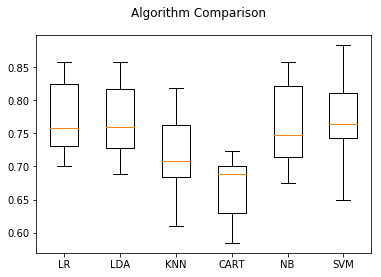

In [82]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()